# Assessment of the World happiness and life expectance data


> The main objective of this projectis to investigate the data and see whether there might be other factors associated with the happiness and life expectancy

> The data I used in this project is from the World Happiness Report. It is a publication of the Sustainable Development Solutions Network, powered by data from the Gallup World Poll and Lloyd’s Register Foundation.

>The World Happiness Report 2021 focuses on the effects of COVID-19 and how people all over the world have fared. Their aim was to focus on the effects of COVID-19 on the structure and quality of people’s lives, and to describe and evaluate how governments all over the world have dealt with the pandemic. In particular, the authors try to explain why some countries have done so much better than others.

> In this report they provided data on happiness ranking and life expectancy together with other social-economic factors.


In [2]:
# load important libraries for data manupulation and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [5]:
# load the dataset
df= pd.read_csv('WHR.csv', delimiter=';')

In [6]:
# look at the dimension of the data
df.shape

(1886, 12)

In [10]:
#look at the header of te data
df.head()

,Country name,Region,year,happiness,Log_GDP_per_capita,Social_support,life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
0,Afghanistan,South Asia,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,South Asia,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,South Asia,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,South Asia,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,South Asia,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


### The structure of the dataset:

> This dataset is tidy and has already been cleaned. The data has 1886 rows and 12 columns. 

### The main features of interest in this dataset:

>Here the variables of interest are the happiness ranking score namly (happiness)


>For many years, people have believed that the happiness of a country's population is highly associated with their annual Gross Domestic Product (GDP). However, other factors such as Freedom_to_make_life_choices, Perceptions_of_corruption, or Positive_affect might be associated with the happiness of a society

## Undenstandingdata with descriptive statistics

In [19]:
#summarize numerical columns only
df.iloc[:, 3:11].describe()

,happiness,Log_GDP_per_capita,Social_support,life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect
count,1886.000000,1862.000000,1877.000000,1835.00000,1856.000000,1810.000000,1782.000000,1868.000000
mean,5.487639,9.387807,0.814975,63.58985,0.744791,-0.001293,0.747851,0.711419
std,1.110343,1.139970,0.116253,7.41545,0.140613,0.163170,0.187339,0.106185
min,2.375000,6.635000,0.291000,32.30000,0.258000,-0.335000,0.035000,0.322000
25%,4.660250,8.481500,0.752000,59.06000,0.650000,-0.116000,0.692000,0.628750
50%,5.405000,9.475500,0.837000,65.32000,0.766000,-0.028000,0.804000,0.723500
75%,6.299000,10.369500,0.907000,68.70000,0.857000,0.090750,0.873750,0.800000
max,8.019000,11.648000,0.987000,77.10000,0.985000,0.698000,0.983000,0.944000


In [20]:
#correlation between numeric variables
df.iloc[:,3:11].corr(method='pearson')

,happiness,Log_GDP_per_capita,Social_support,life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect
happiness,1.000000,0.789735,0.707290,0.743763,0.518940,0.196515,-0.442156,0.521921
Log_GDP_per_capita,0.789735,1.000000,0.697821,0.847450,0.356683,-0.002501,-0.349853,0.284780
Social_support,0.707290,0.697821,1.000000,0.608338,0.415279,0.073081,-0.230916,0.427200
life_expectancy,0.743763,0.847450,0.608338,1.000000,0.383848,0.023038,-0.332992,0.308663
Freedom_to_make_life_choices,0.518940,0.356683,0.415279,0.383848,1.000000,0.335154,-0.496001,0.597709
Generosity,0.196515,-0.002501,0.073081,0.023038,0.335154,1.000000,-0.291702,0.367879
Perceptions_of_corruption,-0.442156,-0.349853,-0.230916,-0.332992,-0.496001,-0.291702,1.000000,-0.302251
Positive_affect,0.521921,0.284780,0.427200,0.308663,0.597709,0.367879,-0.302251,1.000000


# Visual assessment of data

## Univariate data exploration

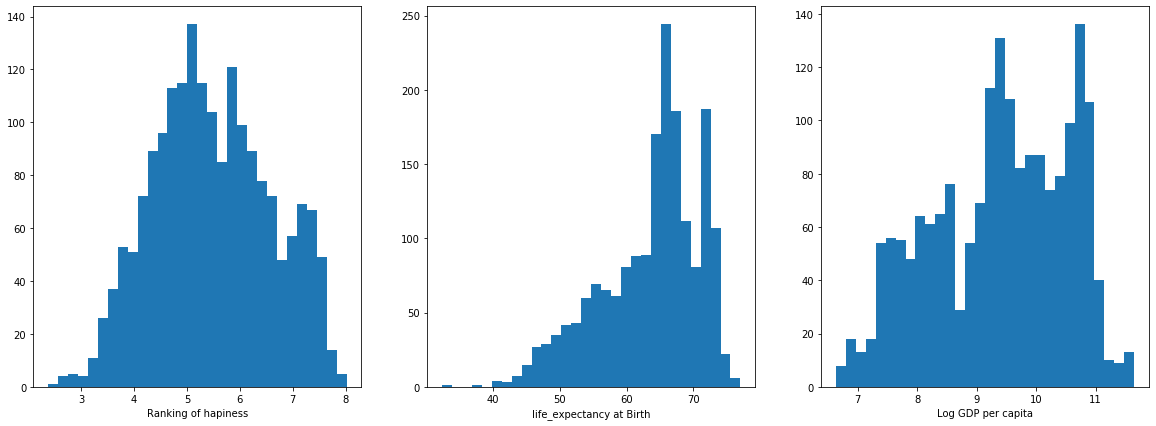

In [23]:
#we will plot three variables at the same time, to assess their distribution
plt.figure(figsize=[20, 7])

# first panel
plt.subplot(1,3,1)# the values in brackets indicate 1 row, 3 columns and first subplot or panel
plt.hist(data=df, x='happiness', bins=30)
plt.xlabel("Ranking of hapiness");

#second panel

plt.subplot(1,3,2)
plt.hist(data=df, x="life_expectancy", bins=30)
plt.xlabel("life_expectancy at Birth");

#third panel

plt.subplot(1,3,3)
plt.hist(data=df, x="Log_GDP_per_capita", bins=30)
plt.xlabel("Log GDP per capita");


> We can observe a non-uniform distribution of the happiness score, life expectancy, and GDP data. A general bimodel on the happiness index and life expectancy can be observed while the GDP data has a multimode distribution.  We also can observe a left tail in the life expectancy dataset.


> Personally, I can't see any unusual data point in the happiness score, and the GDP data. The happiness data points are scaled from 1 to 10 the GDP is already log-transformed. I would say the distribution we see here are mainly related to differences between countries or regions for the two  variables
  
> However, the life expectancy data points have two unusual values below 40 years. It is better to look closely at these points

In [28]:
# Let's look at those two data points
life_exp_outliers=df[df["life_expectancy"]<40]
life_exp_outliers

,Country name,Region,year,happiness,Log_GDP_per_capita,Social_support,life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
648,Haiti,Latin America and Caribbean,2010,3.766,7.384,0.554,32.30,0.373,0.216,0.848,0.555,0.293
649,Haiti,Latin America and Caribbean,2011,4.845,7.423,0.567,36.86,0.413,0.243,0.682,0.625,0.245


These data points make sense since, at this time, Haitians were going through the tough time of earthquakes

/home/benjamin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


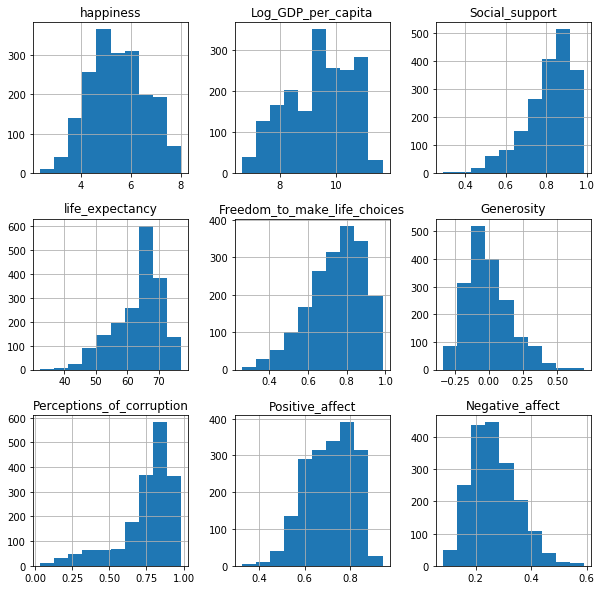

In [52]:
#We can also plot all numeric variables at the same time
fig=plt.figure(figsize=[10,10])
ax=fig.gca()
df.iloc[:,3:12].hist(ax=ax);

/home/benjamin/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/__init__.py:71: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


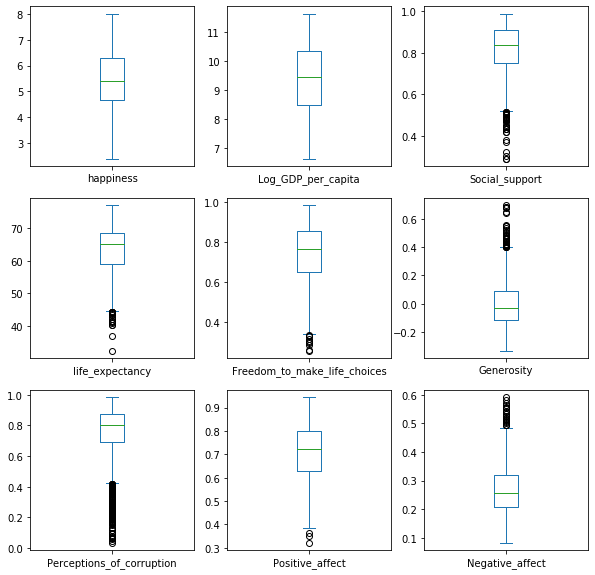

In [51]:
# undestandan data with box plot
fig=plt.figure(figsize=[10,10])
ax=fig.gca()
df.iloc[:,3:12].plot(kind='box', subplots=True, sharex=False, layout=(3,3), sharey=False, ax=ax);

## Bivariate Exploration

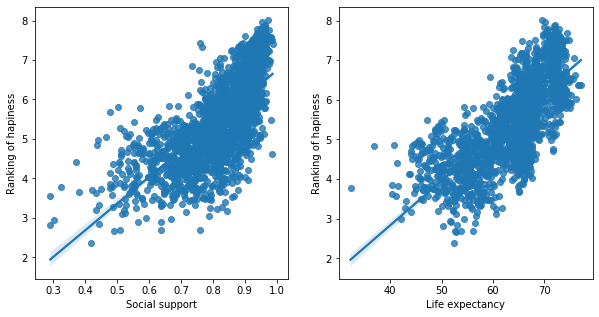

In [61]:
# Pairewise assessment of the ranking of happiness and the life expectancy VS GDP
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
sns.regplot(data=df, x="Social_support", y="happiness")
plt.xlabel("Social support")
plt.ylabel("Ranking of hapiness");

plt.subplot(1,2,2)
sns.regplot(data=df, x="life_expectancy", y="happiness")
plt.xlabel("Life expectancy")
plt.ylabel("Ranking of hapiness");

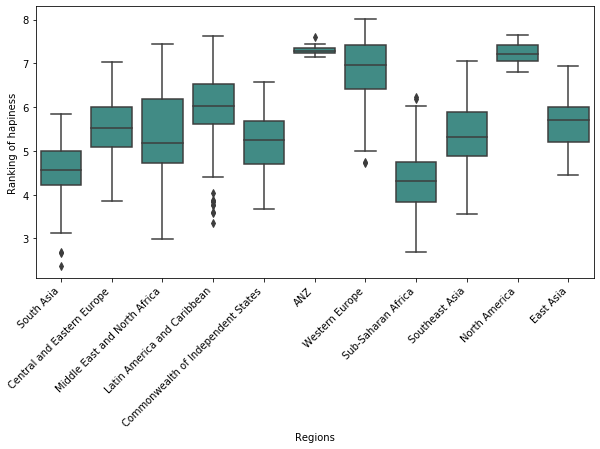

In [63]:
# Ranking of happiness by region using a boxplot
plt.figure(figsize=[10,5])
sns.boxplot(data=df, x="Region", y="happiness", color="#35978f")
plt.xlabel("Regions")
plt.ylabel("Ranking of hapiness")
plt.xticks(rotation=45, ha="right");

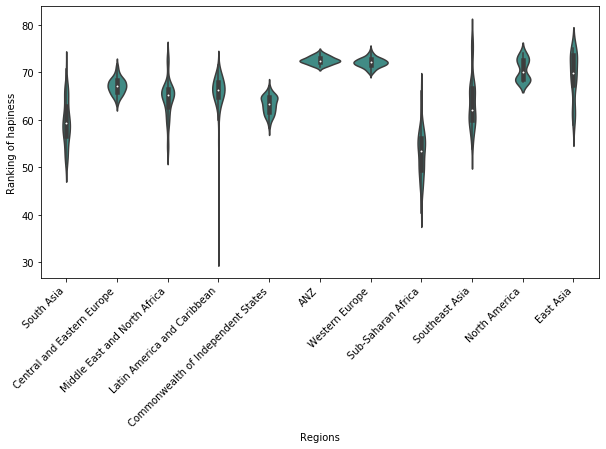

In [68]:
# Ranking of happiness by region using a violin plot
plt.figure(figsize=[10,5])
sns.violinplot(data=df,x="Region", y="life_expectancy",color="#35978f")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Regions")
plt.ylabel("Ranking of hapiness");

> In the first two scatter plots,  we can observe a positive relationship between the Ranking of happiness and the social support.

> We also observe a positive relationship between Ranking of happiness and life expectancy

 

> In the second plot (Box-plot), we can see clear patterns of happiness score distribution across regions. wealthy regions have higher score and vice versa for the low-income regions such as the Sub-Saharan region

## Multivariate Exploration

In this section, we will take a step further and look at the relationship between the features of interest (that is: Ranking of happiness) and other social-economic features